In [44]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import yfinance as yf

In [45]:
# Function to fetch data
def get_data(stocks, start, end):
    stock_data = yf.download(stocks, start=start, end=end)
    stock_data = stock_data['Close']
    returns = stock_data.pct_change()
    mean_return = returns.mean()
    cov_matrix = returns.cov()
    return mean_return, cov_matrix, stock_data

# Parameters
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META']
stocks = [stock for stock in tickers] # List of tickers
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365) # 1 year of data

# Fetch data
mean_return, cov_matrix, stock_data = get_data(stocks, start_date, end_date)

[*********************100%***********************]  5 of 5 completed


In [46]:
# Focus on Apple Inc. (AAPL)
ticker = 'META'
mean_return = mean_return[ticker]
cov_matrix = cov_matrix.loc[ticker, ticker]
initial_price = stock_data[ticker].iloc[-1]

In [47]:
# Monte Carlo simulation parameters
num_simulations = 1000
num_days = 252  # Number of trading days in a year

In [48]:
# Generate random returns based on mean and standard deviation
simulations = np.zeros((num_days, num_simulations))
for i in range(num_simulations):
    daily_returns = np.random.normal(mean_return / num_days, np.sqrt(cov_matrix / num_days), num_days)
    price_series = [initial_price]
    for r in daily_returns:
        price_series.append(price_series[-1] * (1 + r))
    simulations[:, i] = price_series[1:]

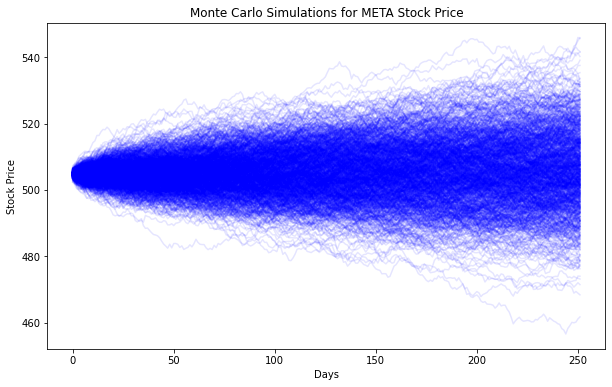

In [49]:
# Plot the simulation results
plt.figure(figsize=(10, 6))
plt.plot(simulations, color='blue', alpha=0.1)
plt.title(f'Monte Carlo Simulations for {ticker} Stock Price')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()

In [50]:
# Calculate and print statistics
final_prices = simulations[-1, :]
mean_final_price = np.mean(final_prices)
median_final_price = np.median(final_prices)
percentile_5 = np.percentile(final_prices, 5)
percentile_95 = np.percentile(final_prices, 95)

print(f"Mean final price: {mean_final_price:.2f}")
print(f"Median final price: {median_final_price:.2f}")
print(f"5th percentile final price: {percentile_5:.2f}")
print(f"95th percentile final price: {percentile_95:.2f}")

Mean final price: 506.01
Median final price: 505.79
5th percentile final price: 486.10
95th percentile final price: 526.13


## Mean Final Price: $506.01

This is the average price predicted for META stock at the end of the simulation period. It indicates that, on average, META stock is expected to be worth approximately $506.01.

## Median Final Price: $505.79

The median price is the middle value in the distribution of simulated final prices. It suggests that 50% of the simulated outcomes result in a final price higher than $505.79, and 50% result in a price lower than this amount. Since the median is very close to the mean, it indicates that the distribution of final prices is fairly symmetric and centered around this value.

## 5th Percentile Final Price: $486.10

The 5th percentile final price indicates that there is a 5% chance that the price of META stock could fall to $486.10 or lower by the end of the period. This is a low-end risk scenario, representing one of the worst outcomes from the simulation.

## 95th Percentile Final Price: $526.13

The 95th percentile final price suggests that there is a 5% chance that META's stock price could rise to $526.13 or higher. This represents one of the best-case scenarios.

In [51]:
# Calculate potential profit or loss
initial_investment = initial_price
mean_profit_or_loss = mean_final_price - initial_investment
median_profit_or_loss = median_final_price - initial_investment
percentile_5_profit_or_loss = percentile_5 - initial_investment
percentile_95_profit_or_loss = percentile_95 - initial_investment

print(f"Expected profit or loss (mean): ${mean_profit_or_loss:.2f}")
print(f"Expected profit or loss (median): ${median_profit_or_loss:.2f}")
print(f"5th percentile profit or loss: ${percentile_5_profit_or_loss:.2f}")
print(f"95th percentile profit or loss: ${percentile_95_profit_or_loss:.2f}")

Expected profit or loss (mean): $1.22
Expected profit or loss (median): $1.00
5th percentile profit or loss: $-18.69
95th percentile profit or loss: $21.34


# Profit or Loss Estimates:

## Mean Expected Profit or Loss: $1.22

On average, if you hold META stock, you would expect to make a profit of $1.22 per share. This is calculated by taking the difference between the average predicted final price ($506.01) and the current price. This average profit represents the central tendency of the potential outcomes.

## Median Expected Profit or Loss: $1.00

The median expected profit or loss is $1.00 per share. This value indicates that in 50% of the simulated scenarios, the profit would be greater than $1.00, while in the other 50% of scenarios, the profit would be less. The closeness to the mean value suggests that the median profit is representative of typical outcomes.

## 5th Percentile Profit or Loss: -$18.69

The 5th percentile represents the point below which 5% of the simulated final prices fall. This implies that there is a 5% chance that the price of META stock could be low enough to result in a loss of up to $18.69 per share. This indicates significant downside risk, suggesting that in some scenarios, the stock could perform poorly.

## 95th Percentile Profit or Loss: $21.34

The 95th percentile represents the point below which 95% of the simulated final prices fall. This implies that there is a 5% chance that the price could exceed a level that provides a profit of up to $21.34 per share. This indicates substantial upside potential, where the stock might perform exceptionally well in some scenarios.

# Conclusion:

## Profit Potential:

The simulation indicates that holding META stock has a positive expected return. On average, you would expect a profit of about $1.22 per share. 
The median outcome of $1.00 per share also suggests a typical profit scenario where you are likely to see a gain.

## Risk Assessment:

### Downside Risk:  
The 5th percentile profit or loss of -$18.69 indicates that there is a risk of significant loss, with a 5% probability of the stock price falling to levels that result in a substantial negative return.

### Upside Potential: 
The 95th percentile profit or loss of $21.34 highlights the potential for considerable gains, with a 5% probability of achieving a high return if the stock performs exceptionally well.

## Investment Implications:

The results provide a range of possible outcomes for META stock, helping investors understand both the potential rewards and risks. The average and median profits suggest a generally positive outlook, but the range of outcomes—including the potential for significant losses—underscores the importance of considering risk when making investment decisions.

## Strategic Considerations:

Investors should weigh the average expected profit against the potential downside risk. If the risk of loss is acceptable relative to the expected returns, investing in META might be considered favorable. However, if the potential loss is a major concern, additional risk mitigation strategies might be necessary.